In [2]:
import sys
sys.path

['d:\\Desktop\\QBM_project_repo\\quMCMC\\final_results_notebooks',
 'd:\\anaconda_neel\\python38.zip',
 'd:\\anaconda_neel\\DLLs',
 'd:\\anaconda_neel\\lib',
 'd:\\anaconda_neel',
 '',
 'd:\\anaconda_neel\\lib\\site-packages',
 'd:\\anaconda_neel\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'd:\\anaconda_neel\\lib\\site-packages\\win32',
 'd:\\anaconda_neel\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda_neel\\lib\\site-packages\\Pythonwin',
 'd:\\anaconda_neel\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NEELKANTH RAWAT\\.ipython']

In [3]:
sys.path.append("d:/Desktop/QBM_project_repo/quMCMC") 

In [4]:
import qumcmc

In [5]:
## import essential modules 
from qumcmc.basic_utils import *
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
from qumcmc.quantum_mcmc_qulacs_2 import quantum_enhanced_mcmc_2
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics
from qumcmc.prob_dist import DiscreteProbabilityDistribution

### Load the BAS dataset

In [6]:
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

     MODEL : ising model BAS 9X9 bars + stripes |  beta : 1.5
Num Most Probable States : 12
Entropy : 3.5849625001146053
---------------------------------------------


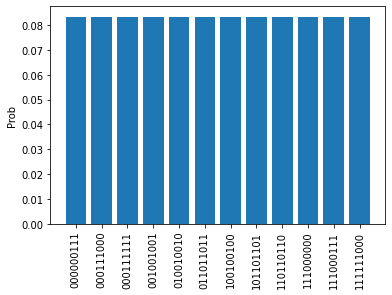

In [7]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt= hebbing_learning(bas.bas_dict["bars"]+ bas.bas_dict["stripes"])## added 2 datapoints from stripes dataset into it
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J=-1*wt
h=np.zeros(n_spins)
model=IsingEnergyFunction(J,h,name=f'ising model BAS {n_spins}X{n_spins} bars + stripes')

# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model, beta)

## get distribution from the model
bpd_2= DiscreteProbabilityDistribution(exact_sampled_model.boltzmann_pd)
exact_sampled_model.sampling_summary()


### Now run 10 different chains for each case and save the data

In [8]:
num_chains=10
steps =10000 # 30000
gamma_range=(0.4,0.6)

initial_state="111000111"

In [9]:
import pickle

In [13]:
### case: random 1 (30k steps) for "BAS_final_plots_Wt1.pkl"
bas_final_wt1=[]



num_chains=10 # reducing the number of chains coz my laptop slowed down all of a sudden
for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_1=quantum_enhanced_mcmc_2(n_hops=10000,
                                            model=model,
                                            initial_state= initial_state,
                                            mixer= [[['random', 1]], []]# add something here,
                                            ,gamma_range=(0.4,0.6) ,verbose=True)
    bas_final_wt1.append(mcmc_1)

### save the list
with open('BAS_final_plots_Wt1_gamma_(0.4,0.6).pkl', 'wb') as f:
    pickle.dump(bas_final_wt1, f)


runnning quantum MCMC steps . ..:   0%|          | 14/10000 [00:00<01:15, 132.23it/s]

chain number: 0
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:32, 108.54it/s]

chain number: 1
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:26, 115.49it/s]

chain number: 2
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:40, 99.14it/s]

chain number: 3
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:44, 95.66it/s]

chain number: 4
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:21, 122.62it/s]

chain number: 5
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 20/10000 [00:00<01:48, 91.87it/s]

chain number: 6
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:20, 124.66it/s]

chain number: 7
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 6/10000 [00:00<03:03, 54.55it/s]

chain number: 8
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:40, 99.07it/s]

chain number: 9
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:43<00:00, 97.00it/s] 


In [ ]:
### case random 1 (75%) + highly symmetric (25%)
### speed of data collection reduced somehow?
bas_custom_111=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_2= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['random', 1], ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]], 
                                            [0.75, 0.25]],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_custom_111.append(mcmc_2)

# ### save the list
# with open('BAS_final_plots_wt1_75_symmetric_25.pkl', 'wb') as f:
#     pickle.dump(bas_custom_1, f)

In [10]:
### case random 1 (75%) + highly symmetric (25%)
bas_custom_1=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_2= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['random', 1], ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]], 
                                            [0.75, 0.25]],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_custom_1.append(mcmc_2)

### save the list
with open('BAS_final_plots_wt1_75_symmetric_25.pkl', 'wb') as f:
    pickle.dump(bas_custom_1, f)
    

runnning quantum MCMC steps . ..:   0%|          | 6/30000 [00:00<08:20, 59.96it/s]

chain number: 0
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 14/30000 [00:00<04:13, 118.16it/s]

chain number: 1
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 14/30000 [00:00<03:37, 137.74it/s]

chain number: 2
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/30000 [00:00<04:59, 100.25it/s]

chain number: 3
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<05:48, 86.06it/s]

chain number: 4
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/30000 [00:00<05:13, 95.69it/s]

chain number: 5
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 14/30000 [00:00<04:07, 121.24it/s]

chain number: 6
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<05:38, 88.69it/s]

chain number: 7
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<05:41, 87.82it/s]

chain number: 8
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<05:09, 96.79it/s]

chain number: 9
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 30000/30000 [05:10<00:00, 96.49it/s] 


In [11]:
### GAMMA = (0.9,0.95)
gamma_range=(0.9,0.95)
initial_state="111000111"
steps=10000

### case random 1 (75%) + highly symmetric (25%)
bas_custom_1=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_2= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['random', 1], ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]], 
                                            [0.75, 0.25]],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_custom_1.append(mcmc_2)

### save the list
with open('BAS_final_plots_wt1_75_symmetric_25_gamma_(0.9,0.95).pkl', 'wb') as f:
    pickle.dump(bas_custom_1, f)

    
### case random 1 (25%) +  Highly symmetric (75%)
### 10000 steps
### gamma range= (0.9,0.95)
bas_custom_2=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_2= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['custom',[[2, 5, 8], [1, 4, 7], [0, 3, 6]] ], #stripes: [(X2,X5,X8),(X1,X4,X7),(X0,X3,X6)]
                                            ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],
                                            ['random', 1]
                                            ],
                                            [0.25,0.25,0.50]],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_custom_2.append(mcmc_2)

    
### save the list
with open('BAS_final_plots_wt1_50_bars_and_stripes_symm_50_gamma_(0.9,0.95).pkl', 'wb') as f:
    pickle.dump(bas_custom_2, f)

runnning quantum MCMC steps . ..:   0%|          | 22/10000 [00:00<01:32, 107.38it/s]

chain number: 0
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 15/10000 [00:00<01:09, 144.39it/s]

chain number: 1
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 49/10000 [00:00<00:41, 241.66it/s]

chain number: 2
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:27, 114.18it/s]

chain number: 3
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 33/10000 [00:00<01:07, 147.29it/s]

chain number: 4
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:34, 105.39it/s]

chain number: 5
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:32, 108.28it/s]

chain number: 6
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:17, 129.33it/s]

chain number: 7
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 24/10000 [00:00<01:25, 116.64it/s]

chain number: 8
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 17/10000 [00:00<00:59, 168.66it/s]

chain number: 9
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:29, 111.30it/s]

chain number: 0
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:17, 129.58it/s]

chain number: 1
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 30/10000 [00:00<01:13, 136.12it/s]

chain number: 2
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:28, 112.59it/s]

chain number: 3
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:25, 116.69it/s]

chain number: 4
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:18, 126.78it/s]

chain number: 5
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 8/10000 [00:00<02:13, 74.66it/s]

chain number: 6
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:30, 109.94it/s]

chain number: 7
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:47, 92.84it/s]

chain number: 8
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 16/10000 [00:00<01:16, 129.85it/s]

chain number: 9
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:20<00:00, 124.43it/s]


### Trying the standarise the problem for the case of mixture of mixers

In [14]:
num_chains=10
steps =10000 # 30000
gamma_range=[(0.9,0.95), (0.9,0.95), (0.4,0.6)]

initial_state="111000111"

my_mixer = [[['custom',[[2, 5, 8], [1, 4, 7], [0, 3, 6]] ], #stripes: [(X2,X5,X8),(X1,X4,X7),(X0,X3,X6)]
                                            ['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],
                                            ['random', 1]
                                            ],
                                            [0.15,0.15,0.7]]

In [15]:
import pickle

In [16]:
bas_std=[]
for i in range(0, num_chains):  
    mcmc_std = quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=my_mixer,
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_std.append(mcmc_std)

### save the list
with open('BAS_final_plots_wt1_50_bars_and_stripes_symm_50_gamma_std.pkl', 'wb') as f:
    pickle.dump(bas_std, f)

runnning quantum MCMC steps . ..:   0%|          | 0/10000 [00:00<?, ?it/s]

runnning quantum MCMC steps . ..:   0%|          | 14/10000 [00:00<01:18, 127.51it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:39, 100.34it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 8/10000 [00:00<02:11, 75.97it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:28, 112.45it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 7/10000 [00:00<02:23, 69.49it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:34, 105.90it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:40, 99.10it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:37, 102.73it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/10000 [00:00<01:55, 86.31it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 8/10000 [00:00<02:13, 74.58it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:24<00:00, 117.76it/s]


In [13]:
num_chains=10
steps =10000 # 30000
gamma_range=[(0.9,0.95), (0.4,0.6)]

initial_state="111000111"

my_mixer = [[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],### bars
                                            ['random', 1]] ### for random proposal
                                            ,
                                            [0.30,0.70]### proposal probabilities
                                            ]


bas_std_2=[]
for i in range(0, num_chains):  
    mcmc_std2 = quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=my_mixer,
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_std_2.append(mcmc_std2)

### save the list
with open('BAS_final_plots_wt1_70_bars_symm_30_gamma_std.pkl', 'wb') as f:
    pickle.dump(bas_std_2, f)

runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:27, 113.69it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:31, 109.77it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/10000 [00:00<02:06, 79.09it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:22, 121.03it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:37, 102.02it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:30, 110.95it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 15/10000 [00:00<01:17, 128.65it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:31, 109.24it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 13/10000 [00:00<01:34, 105.19it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 10/10000 [00:00<01:45, 94.72it/s]

starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:24<00:00, 118.63it/s]


In [15]:
num_chains=10
steps =10000 # 30000
gamma_range=[(0.9,0.95), (0.4,0.6)]

initial_state="111000111"

my_mixer = [[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]],### bars
                                            ['random', 1]] ### for random proposal
                                            ,
                                            [0.40,0.60]### proposal probabilities
                                            ]


bas_std_2=[]
for i in range(0, num_chains):  
    print(f"chain number: {i+1}")
    mcmc_std2 = quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=my_mixer,
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_std_2.append(mcmc_std2)

### save the list
with open('BAS_final_plots_wt1_60_bars_symm_40_gamma_std.pkl', 'wb') as f:
    pickle.dump(bas_std_2, f)

runnning quantum MCMC steps . ..:   0%|          | 0/10000 [00:00<?, ?it/s]

runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:33, 107.22it/s]

chain number: 1
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:34, 105.87it/s]

chain number: 2
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:27, 114.08it/s]

chain number: 3
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 27/10000 [00:00<01:18, 126.38it/s]

chain number: 4
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 9/10000 [00:00<02:08, 77.73it/s]

chain number: 5
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:36, 103.27it/s]

chain number: 6
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 15/10000 [00:00<01:06, 149.72it/s]

chain number: 7
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 11/10000 [00:00<01:35, 104.10it/s]

chain number: 8
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 28/10000 [00:00<01:14, 133.49it/s]

chain number: 9
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..:   0%|          | 12/10000 [00:00<01:26, 115.34it/s]

chain number: 10
starting with:  111000111 with energy: -48.0


runnning quantum MCMC steps . ..: 100%|██████████| 10000/10000 [01:27<00:00, 114.46it/s]
